# Etap 1.3.1
# prosta klasteryzacja na danych tylko z roku

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Data/Concatenated Features/by_year_features.csv")
df= df.fillna(0)
df.head()

,indeks,(SubTotal),Przepisy długoterminowe,Amortyzacja i straż pożarna,Kapitał partnerstwa głównego,Akcje mniejszościowe,Przepisy zadłużenia,Żywe istoty,Zachęta państwowa i pomoc,Zwiększenie wartości fundusze,...,Zobowiązania długoterminowe,Inne dochody i wydatki przed opodatkowaniem,Yab. Money Trans. Różnica. Efekt. Poprzedni.nak.ve nak. Tak jak. Wzrost/spadek netto,Sprzedaż zagraniczna,Sprzedaż krajowa,Akcje zysków/strat inwestycji cenianych metodą samowystarczalności,Samo -właściwość,Źródło_pliku,Nazwa,Rok
0,Yıllık,4.524640e+08,678404.0,1242248.0,1.387926e+08,0.0,2852756.0,0.0,0.0,0.0,...,2806817.0,449296.0,-9990337.0,0.0,0.0,0.0,1.387926e+08,A1CAP_2020.xlsx,A1CAP,2020
1,Yıllık,8.515088e+08,0.0,3263754.0,2.966258e+08,0.0,6670834.0,0.0,0.0,0.0,...,8695590.0,777230.0,121976765.0,0.0,0.0,0.0,2.966258e+08,A1CAP_2021.xlsx,A1CAP,2021
2,Yıllık,4.019261e+09,4748296.0,12651941.0,1.487849e+09,0.0,70752251.0,0.0,0.0,0.0,...,132279622.0,17107575.0,463136619.0,0.0,0.0,0.0,1.487849e+09,A1CAP_2022.xlsx,A1CAP,2022
3,Yıllık,6.297396e+09,7715324.0,21452328.0,3.696944e+09,0.0,42331251.0,0.0,0.0,0.0,...,34025698.0,6055765.0,691863980.0,0.0,0.0,0.0,3.696944e+09,A1CAP_2023.xlsx,A1CAP,2023
4,Yıllık,8.297508e+09,9773361.0,31826374.0,4.065838e+09,0.0,28062814.0,0.0,0.0,0.0,...,160295553.0,5169826.0,369461172.0,0.0,0.0,0.0,4.065838e+09,A1CAP_2024.xlsx,A1CAP,2024


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

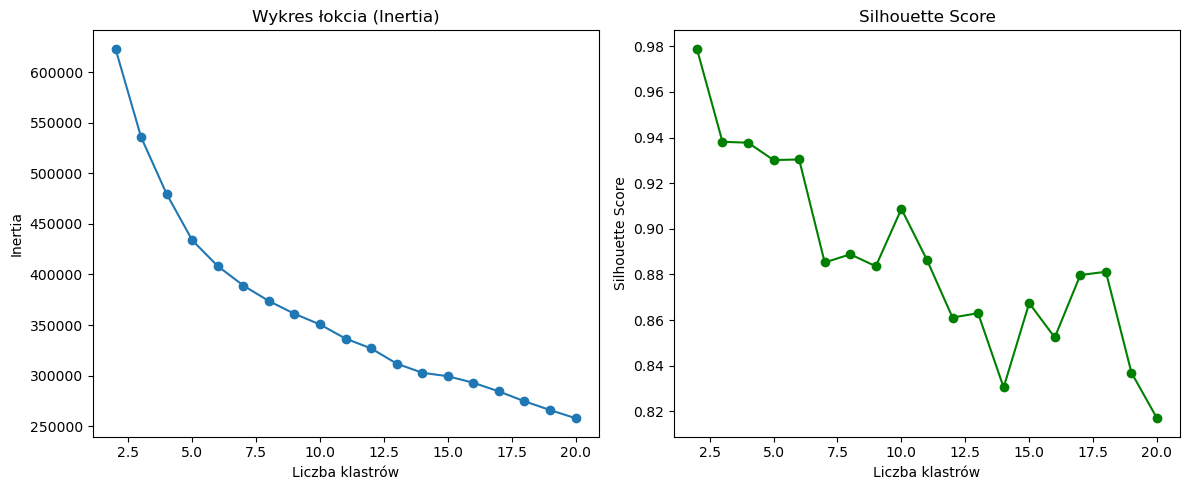

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 1. Drop niepotrzebnych kolumn
columns_to_drop = ['indeks','Rok', 'Nazwa', 'Źródło_pliku']
df_clean = df.drop(columns=columns_to_drop)

# 2. Standaryzacja (uwaga: jeśli są NaN lub nienumeryczne kolumny, to scaler rzuci błąd)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# 3. Testowanie różnych liczby klastrów
inertias = []
sil_scores = []
cluster_range = range(2, 21)  # od 2 do 20 klastrów

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, clusters))

# 4. Wykres łokcia + silhouette
plt.figure(figsize=(12,5))

# Inertia
plt.subplot(1,2,1)
plt.plot(cluster_range, inertias, marker='o')
plt.title('Wykres łokcia (Inertia)')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inertia')

# Silhouette
plt.subplot(1,2,2)
plt.plot(cluster_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


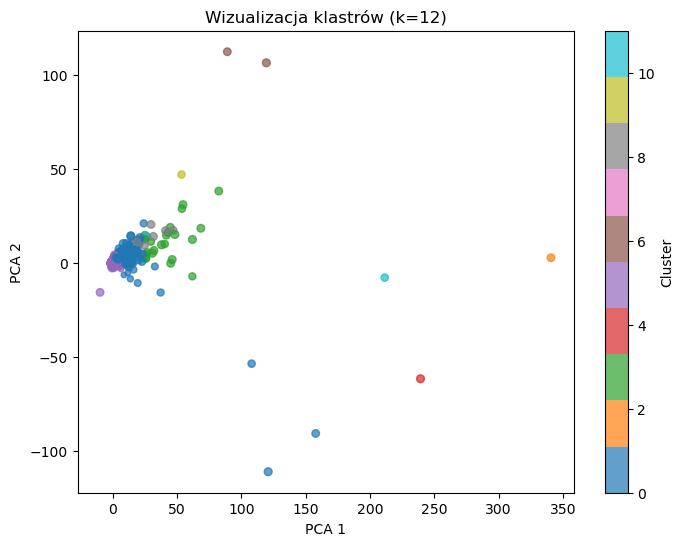

In [4]:
from sklearn.decomposition import PCA

# 1. Klasteryzacja na wybraną liczbę klastrów, np. 5
best_k = 12
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 2. Redukcja wymiarów do 2D (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Rok do wizualizacji rozmiaru
years = df['Rok']

# 4. Wizualizacja
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', 
                      s=(years - years.min()) * 2, alpha=0.7)  # rozmiar zależny od roku
plt.colorbar(scatter, label='Cluster')
plt.title(f'Wizualizacja klastrów (k={best_k})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

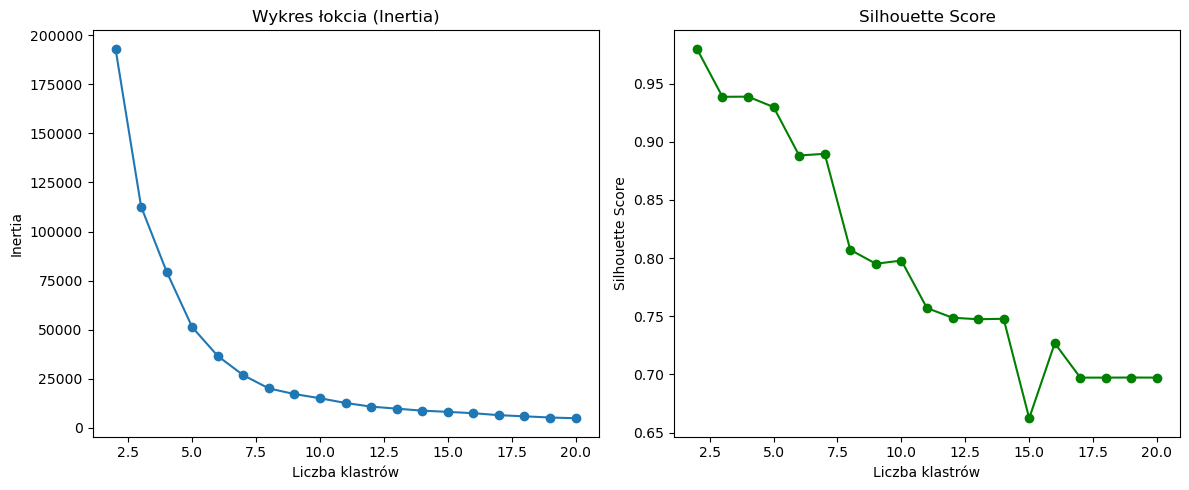

In [5]:
# 3. Testowanie różnych liczby klastrów
inertias = []
sil_scores = []
cluster_range = range(2, 21)  # od 2 do 20 klastrów

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, clusters))

# 4. Wykres łokcia + silhouette
plt.figure(figsize=(12,5))

# Inertia
plt.subplot(1,2,1)
plt.plot(cluster_range, inertias, marker='o')
plt.title('Wykres łokcia (Inertia)')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inertia')

# Silhouette
plt.subplot(1,2,2)
plt.plot(cluster_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()